# Install and Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
% matplotlib inline
import seaborn as sns
from tabulate import tabulate

import lightgbm as lgb
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset and give it the desired format

In [ ]:
from sklearn.datasets import load_breast_cancer, load_boston
bc = load_breast_cancer()
boston = load_boston()

df_classification = pd.DataFrame(data=np.c_[bc['data'], bc['target']], columns=list(bc['feature_names'])+['target'])
df_regression = pd.DataFrame(data=np.c_[boston['data'], boston['target']], columns=list(boston['feature_names'])+['target'])

In [ ]:
df_classification.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
df_regression.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Train / Test split

In [ ]:
X = df_classification.drop('target', axis=1)
y = df_classification['target']
X_train_classification, X_val_classification, y_train_classification, y_val_classification = train_test_split(X, y, test_size = 0.3, random_state = 101)

X = df_regression.drop('target', axis=1)
y = df_regression['target']
X_train_regression, X_val_regression, y_train_regression, y_val_regression = train_test_split(X, y, test_size = 0.3, random_state = 101)

# Models

Define parameters

In [ ]:
n_trees = 1000
lr = 0.05
rs = 101

#Decision Tree

Decision trees can be used for either regression or classification tasks. Decision trees are a powerful tool; however, **are very prone to overfitting the training dataset** and therefore often fail to generalize well to test data sets. 

Whereas decision trees and associated algorithms are **no longer restricted to independent variables** which have a linear relationship and we don't have to ensure several assumptions are true.

## Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize model
dtree_reg= DecisionTreeRegressor(random_state=42)
dtree_reg.fit(X_train_regression, y_train_regression)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
acc_dt_reg = dtree_reg.score(X_val_regression, y_val_regression)
print("Testing score:",acc_dt_reg)

Testing score: 0.7822143874800034


In [ ]:
y_pred = dtree_reg.predict(X_val_regression)

In [ ]:
pd.DataFrame(list(zip(y_pred, y_val_regression)))

,0,1
0,48.5,50.0
1,33.4,36.2
2,9.6,11.7
3,13.8,14.9
4,27.9,30.8
...,...,...
147,21.6,28.1
148,22.5,20.7
149,22.9,29.1
150,16.6,17.5


## Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree_class = DecisionTreeClassifier(criterion="entropy", splitter="best", min_samples_split= 5, min_samples_leaf= 3, random_state= 101)
dtree_class.fit(X_train_classification, y_train_classification)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [ ]:
# 2 Ways of caluclating Accuracy by score directly of by predicting values and use accuracy_score from sklearn
acc_dt_classification = dtree_class.score(X_val_classification, y_val_classification)
print("Accuracy:",acc_dt_classification)

y_pred = dtree_class.predict(X_val_classification)
print("Accuracy:", metrics.accuracy_score(y_val_classification, y_pred))

Accuracy: 0.9473684210526315
Accuracy: 0.9473684210526315


In [ ]:
importances = dtree_class.feature_importances_
indices = np.argsort(importances)[::-1]
df_importances = pd.DataFrame(list(zip(X_train_classification.columns[indices],importances[indices])), columns=["Kind", "Value"])
df_importances = df_importances[df_importances["Value"] > 0]

+----+----------------------+------------+
|    | Kind                 |      Value |
|----+----------------------+------------|
|  0 | worst perimeter      | 0.727665   |
|  1 | worst concave points | 0.0780812  |
|  2 | worst texture        | 0.063564   |
|  3 | worst area           | 0.0428369  |
|  4 | mean smoothness      | 0.0407855  |
|  5 | worst smoothness     | 0.0244663  |
|  6 | worst concavity      | 0.0150716  |
|  7 | worst symmetry       | 0.00752953 |
+----+----------------------+------------+


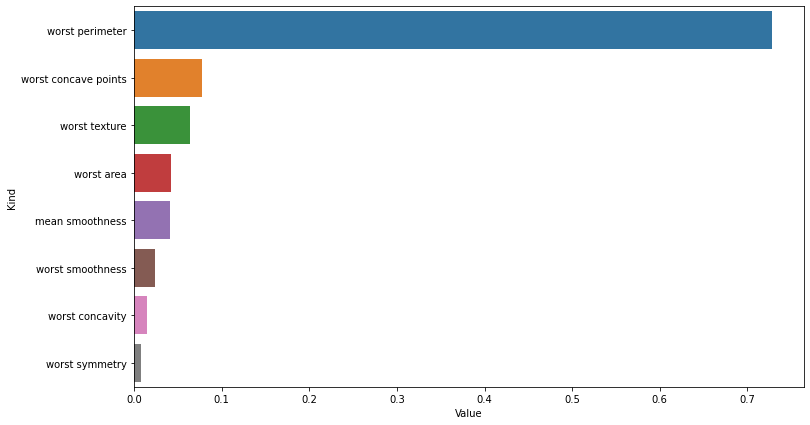

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(y= df_importances.Kind,
            x= df_importances.Value);
print(tabulate(df_importances, headers = 'keys', tablefmt = 'psql'))

## Advanced Topics

### K-folds

K-folds is a method of evaluating and tuning a model on the given dataset without overfitting to either the training dataset or the testing dataset. It finds the optimal balance between bias and variance in the model.

Below we show how the model performs on the training and test datasets while varying the max tree depth.

Text(0.5, 0, 'Max depth of the tree')

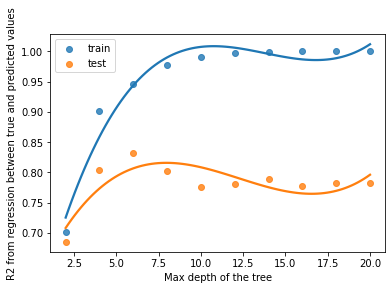

In [ ]:
# define max depth range
depth_range = np.asarray(range(2,22,2))

# initialize empty arrays to store the results
scores_train = np.zeros(len(depth_range))
scores_test = np.zeros(len(depth_range))

for i in range(len(depth_range)):
    # train DTR with given max depth
    dt_regressor = DecisionTreeRegressor(max_depth=depth_range[i], random_state=42)
    model = dt_regressor.fit(X_train_regression, y_train_regression)
    # evaluate on both training and test datasets
    scores_train[i] = model.score(X_train_regression, y_train_regression)
    scores_test[i] = model.score(X_val_regression, y_val_regression)

# plot the results on the same graph
ax = sns.regplot(x=depth_range, y=scores_train, order=3, ci=None,label='train')
sns.regplot(x=depth_range, y=scores_test,order=3, ci=None, label='test', ax=ax)
ax.legend(loc='best')
ax.set_ylabel('R2 from regression between true and predicted values')
ax.set_xlabel('Max depth of the tree')

As the depth increases:

The training score increases
But the testing score decreases
Once the test score starts decreasing, this indicates that the model is overfitting.

In [ ]:
# initialize empty array to store results
scores_cv = np.empty(len(depth_range))
for i in range(len(depth_range)):
    # initialize model
    dt_regressor = DecisionTreeRegressor(max_depth=depth_range[i], random_state=42)
    # calculate the cross val scores. This returns an array where each element corresponds to the performance on each k-fold.
    cv_scores = cross_val_score(dt_regressor, X_train_regression, y_train_regression, cv=5, n_jobs=-1)
    # calculate mean cross validation score and save
    scores_cv[i] = np.mean(cv_scores)

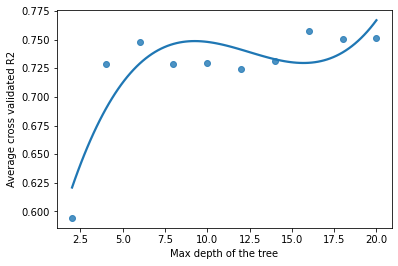

In [ ]:
# plot results
ax = sns.regplot(x=depth_range, y=scores_cv, ci=None, order=3);
ax.set_xlabel('Max depth of the tree');
ax.set_ylabel('Average cross validated R2');

Again we see the same general trend of the score increasing intially and then dropping off. From this curve, the optimal max_depth would be between 8 and 11.

For Classification we need to use a different approach

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(dtree_class, X_train_classification, y_train_classification, scoring="accuracy", cv = cv, n_jobs=1)
scores

array([0.875     , 0.925     , 0.975     , 0.95      , 0.925     ,
       0.9       , 0.95      , 0.9       , 0.92307692, 0.8974359 ])

In [ ]:
score = np.mean(scores)
score

0.9220512820512822

In [ ]:
for i in range (1,11):
  tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split= 20, random_state=99)
  tree.fit(X_train_classification, y_train_classification)
  cv = KFold(n_splits=10, shuffle=True, random_state=1)
  scores = cross_val_score(tree, X_train_classification, y_train_classification, scoring="accuracy", cv = cv, n_jobs=1)
  score = np.mean(scores)
  print("Score para i = ",i," es de ", score)
  print("   ",tree.feature_importances_)

Score para i =  1  es de  0.8794871794871796
    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0.]
Score para i =  2  es de  0.8845512820512822
    [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.90309449 0.
 0.         0.         0.         0.09690551 0.         0.        ]
Score para i =  3  es de  0.9196153846153846
    [0.         0.         0.         0.         0.         0.
 0.         0.         0.02534006 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.07126717 0.81584903 0.
 0.         0.         0.         0.08754374 0.         0.        ]
Score para i =  4  es de  0.9270512820512821
    [0.         0.         0.         0.         0.01969759 0.
 0.         0.         0.         0.        

### GridSearchCV (CV = cross validation)

Sklearn's GridSearchCV uses the cross-validation above to assess the performance of each possible permutation of the hyper-parameters that you specify. For this reason, care should be taken to choose the correct range of parameters to search through as adding an additional parameter can increase the search time exponentially.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'max_depth':[8,10,14], 
              'min_impurity_decrease': [.1,.01, 0.0],
              'min_samples_split': [10, 50, 2]}
# Initialize model
decision_regressor= DecisionTreeRegressor(random_state=42)

# Initialize GridSearch and then fit
dtree_reg_GS = GridSearchCV(decision_regressor, parameters)
dtree_reg_GS.fit(X_train_regression, y_train_regression)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [8, 10, 14],
                         'min_impurity_decrease': [0.1, 0.01, 0.0],
                         'min_samples_split': [10, 50, 2]},
             pre_dis

In [ ]:
training_score_dt_reg_gs = dtree_reg_GS.score(X_train_regression, y_train_regression)
testing_score_dt_reg_gs = dtree_reg_GS.score(X_val_regression, y_val_regression)
print("Training score:", training_score_dt_reg_gs)
print("Testing score with GridSearch:",testing_score_dt_reg_gs)
print("Testing score without GridSearch:",testing_score_dt_reg)

Training score: 0.9516562373426716
Testing score with GridSearch: 0.8214459082837886
Testing score without GridSearch: 0.7822143874800034


We can see the increase of almost 4% of accuracy with the implementation of GridSearch on the Decision Tree Regression model

In [ ]:
dtree_reg_GS.best_params_

{'max_depth': 10, 'min_impurity_decrease': 0.1, 'min_samples_split': 10}

In [ ]:
dtree_reg_GS.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.1, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

# Random Forest

The Random Forest algorithm is based on Decisions Trees and can be used for either regression or classification tasks. To overcome Decisions Trees tendancy to overfit, Random Forests aggregate the results from many decision trees with an [ensemble approach](http://scikit-learn.org/stable/modules/ensemble.html).

Random Forests, use bagging to prevent overfitting by only allowing a given decision tree to optimize for a random subset of the data for every tree, and a random subset of the input features at every split. 

As Decision Trees naturally overfit to the data, better performance is achieved when an **ensemble approach** such as **Bagging** is used.

As an ensemble method, bagging does the following:

*   Creates N random subsamples of the dataset using selection with replacement. (Statistically 1/3 of the data is left of each subsample)
*   Trains a new decision tree on each N subsample
*   Takes the prediction from each and every N tree and averages the result
*   This average is the final output of the bagging model

This **Ensemble approach** uses the results of several random analyses to find an average response.

For each tree, there will be a sample of data which was not used to train the algorithm. This means that we can also measure the **out-of-bag score** ( or **oob_score**). This score evaluates the performance of the model on the sample not used while training an individual tree. (On average, a random ~1/3 of data are not used to train a given tree).

## Regression

In [ ]:
num_features = X_train_regression.shape[1]
print("Number of features = ", num_features)

Number of features =  13


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_features= num_features, random_state=rs, oob_score=True)
rfr.fit(X_train_regression, y_train_regression)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=13, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=101, verbose=0, warm_start=False)

In [ ]:
acc_rf_reg_train = rfr.score(X_train_regression, y_train_regression)
acc_rf_reg = rfr.score(X_val_regression, y_val_regression)
oob_score = rfr.oob_score_
print("Train score:", acc_rf_reg_train)
print("Test score:", acc_rf_reg)
print("OOB score:", oob_score)

Train score: 0.9822828862744533
Test score: 0.8605118513429699
OOB score: 0.869847734118893


### Tune Parameters

In [ ]:
parameters = {'max_depth':[7,10,15], 
              'n_estimators': [50,100,200]}

rf_regressor= RandomForestRegressor(n_jobs=-1, max_features= num_features, random_state= rs, oob_score= True)

regressor = GridSearchCV(rf_regressor, parameters)
regressor.fit(X_train_regression, y_train_regression)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features=13,
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=True, random_state=101,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=No

In [ ]:
regressor.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 13,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}

In [ ]:
parameters = regressor.best_estimator_.get_params()
rf_regressor= RandomForestRegressor(**parameters)
rf_regressor.fit(X_train_regression, y_train_regression)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=13, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=True,
                      random_state=101, verbose=0, warm_start=False)

In [ ]:
acc_rf_reg_train = rf_regressor.score(X_train_regression, y_train_regression)
acc_rf_reg_test = rf_regressor.score(X_val_regression, y_val_regression)
oob_score = rf_regressor.oob_score_
print("Train score:", acc_rf_reg_train)
print("Test score:", acc_rf_reg_test)
print("OOB score:", oob_score)

Train score: 0.9807962100457094
Test score: 0.8627073430469938
OOB score: 0.871046586708871


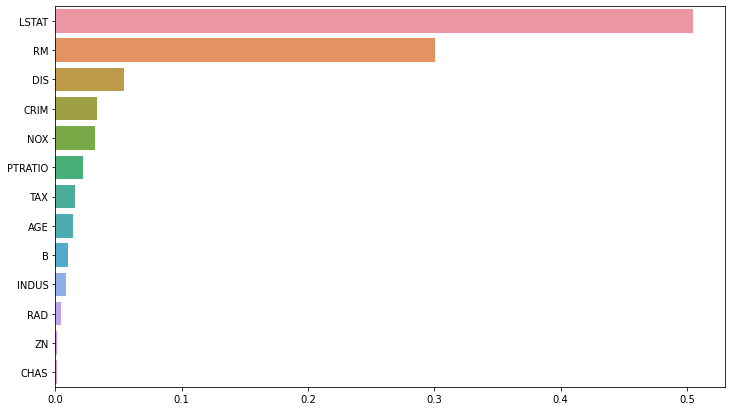

In [ ]:
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,7))
sns.barplot(y=X_train_regression.columns[indices],
            x=importances[indices]);

## Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=n_trees, random_state=rs, n_jobs=-1, oob_score= True)
rfc.fit(X_train_classification, y_train_classification)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=101, verbose=0,
                       warm_start=False)

In [ ]:
acc_rf_classification = rfc.score(X_val_classification, y_val_classification)
oob_score = rfc.oob_score_
print("Test score:", acc_rf_classification)
print("OOB score:", oob_score)

Test score: 0.9590643274853801
OOB score: 0.9597989949748744


In [ ]:
rfc.base_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

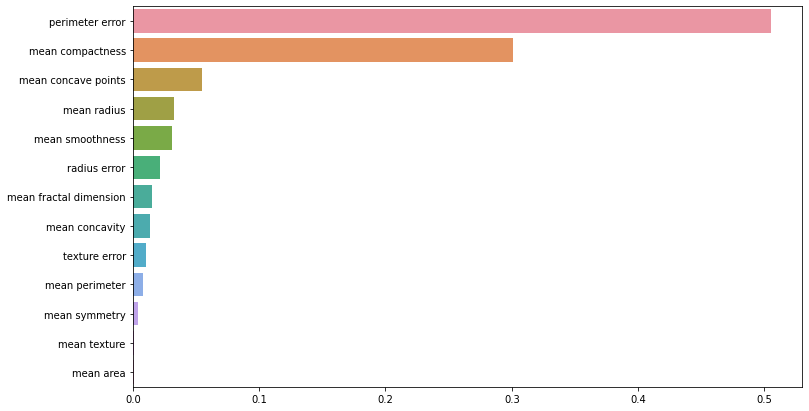

In [ ]:
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,7))
sns.barplot(y=X_train_classification.columns[indices],
            x=importances[indices]);

We can also pass diferent arrays of parameters and train them in order to select the best performane for this model as we have been done on the Regression Random Forest

# XGBOOST Model



XGBoost stands for "Extreme Gradient Boosting". It is a Random Forest model with Boosting and optimised for speed.

**What is Boosting?**

I'ts very similar to a Random Forest algorithm but instead of creating the new trees at random, you create them looking to minimize the error.

More info about Gradient Boosting Machines:
https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab

In [ ]:
import xgboost as xgb

## Regression

In [ ]:
xgb_model=xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=n_trees, learning_rate=lr, random_state=rs, n_jobs=-1) #for the best model, high number of estimators, low learning rate
xgb_model.fit(X_train_regression, y_train_regression)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=101, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
acc_xgb_reg = xgb_model.score(X_val_regression,y_val_regression)
print("Test score:",acc_xgb_reg)

Test score: 0.8787903725114736


We can also tune parameters with GridSearchCV

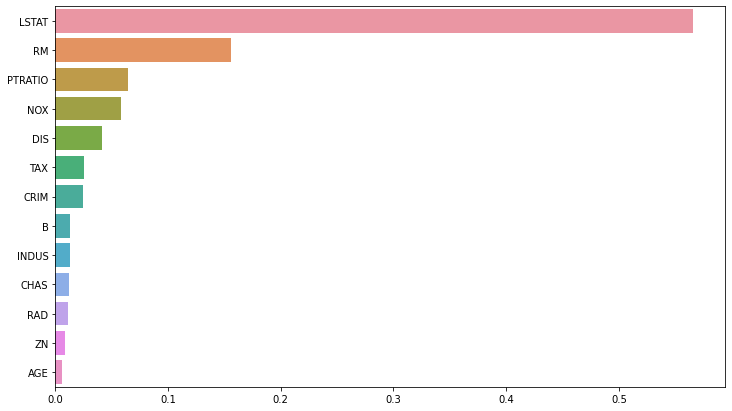

In [ ]:
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,7))
sns.barplot(y=X_train_regression.columns[indices],
            x=importances[indices]);

## Classification

In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=n_trees, learning_rate=lr, random_state=rs,  n_jobs=-1) #for the best model, high number of estimators, low learning rate
xgb_model.fit(X_train_classification, y_train_classification)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
acc_xgb_classification = xgb_model.score(X_val_classification,y_val_classification)
print("Test score", acc_xgb_classification)

Test score 0.9649122807017544


# CatBoost Model
Very useful when dealing with categorical features. With the datasets in this session we can't use the most powerful feature of catboost which is its processing of categorical features. When dealing with categorical features you should use the parameter *cat_features* — This parameter is a must in order to leverage Catboost preprocessing of categorical features, if you encode the categorical features yourself and don’t pass the columns indices as cat_features you are missing the essence of Catboost.

There is an example of code in the comments of how to use the categorical features

More info:
https://towardsdatascience.com/https-medium-com-talperetz24-mastering-the-new-generation-of-gradient-boosting-db04062a7ea2

https://medium.com/@hanishsidhu/whats-so-special-about-catboost-335d64d754ae



In [ ]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 35 kB/s 


In [ ]:
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

## Regression

In [ ]:
cat_model = CatBoostRegressor(silent=True, n_estimators=n_trees, learning_rate=lr, random_state=rs)
cat_model.fit(X_train_regression, y_train_regression)

In [ ]:
acc_cb_reg = cat_model.score(X_val_regression, y_val_regression)
print("Test Score:", acc_cb_reg)

Test score 0.8912064079318497


## Classification

In [ ]:
cat_model = CatBoostClassifier(silent=True, n_estimators=n_trees, learning_rate=lr, random_state=rs)
cat_model.fit(X_train_classification, y_train_classification)

In [ ]:
acc_cb_classification = 1-sum(cat_model.predict(X_val_classification)-y_val_classification)/len(y_val_classification)
print("Test Score:", acc_cb_classification)

Test Score 0.9883040935672515


# AdaBoost

Another way of boosting.

More info:
https://towardsdatascience.com/boosting-and-adaboost-clearly-explained-856e21152d3e

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

## Regression

In [ ]:
model = AdaBoostRegressor(random_state=101, n_estimators=n_trees, learning_rate=lr)
model.fit(X_train_regression, y_train_regression)

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                  n_estimators=1000, random_state=101)

In [ ]:
acc_ab_reg = model.score(X_val_regression, y_val_regression)
print("Test score:", acc_ab_reg)

Test score: 0.8279691982291295


## Classification

In [ ]:
model = AdaBoostClassifier(random_state=101, n_estimators=n_trees, learning_rate=lr)
model.fit(X_train_classification, y_train_classification)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=1000, random_state=101)

In [ ]:
acc_ab_classification = model.score(X_val_classification,y_val_classification)
print("Test Score:", acc_ab_classification)

Test Score: 0.9590643274853801


# Model performance comparison

In [ ]:
models_regression = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost', 'AdaBoost'],
                       'Score': [acc_dt_reg, acc_rf_reg, acc_xgb_reg, acc_cb_reg, acc_ab_reg]})
models_regression.sort_values(by='Score', ascending=False)

,Model,Score
3,CatBoost,0.891206
2,XGBoost,0.878790
1,Random Forest,0.860512
4,AdaBoost,0.827969
0,Decision Tree,0.782214


In [ ]:
models_categorical = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost', 'AdaBoost'],
                       'Score': [acc_dt_classification, acc_rf_classification, acc_xgb_classification, acc_cb_classification, acc_ab_classification]})
models_categorical.sort_values(by='Score', ascending=False)

,Model,Score
3,CatBoost,0.988304
2,XGBoost,0.964912
1,Random Forest,0.959064
4,AdaBoost,0.959064
0,Decision Tree,0.947368
